# Tratamiento Inteligente de Datos
# Práctica Inidividual
# Arbol de decisión
____

## **1. Fichero y librerías necesarias**

### **1.1 Fichero Necesario**

- **seeds.txt :** Fichero con el que se trabajará en esta práctica

### **1.2 Liberías Necesarias**

- **Pandas :** Proceso de tratar los datos como leer el dataframe, modificarlos, acceder a ellos, etc...
- **Sklearn :** librería para machine learning en la que podremos crear *árboles de decisión*, entrenar el modelo, etc...
- **Graphviz :**  Librería para poder mostrar el árbol de decisión

### **2. Instalación de paquetes**



In [0]:
pip install pandas sklearn graphviz


___

<br>

## **3. Comienzo de la práctica**

### **3.1 Creación del Dataframe**

Importamos la librerías **pandas** con la que leeremos el fichero y creamos nuestro dataframe

In [0]:
import pandas as pd

In [0]:
dataframe_file = 'seeds.txt' 

# Leemos el fichero y le introducimos los nombres de las columnas que tendremos

dataframe = pd.read_csv(dataframe_file, delimiter="\s+", names=['area', 'perimeter','compactibility', 'nucleus_length', 'nucleus_width', 'asymmetry_coefficient', 'groove_length', 'seed_type'])

In [384]:
#Visualizamos el dataframe

dataframe

,area,perimeter,compactibility,nucleus_length,nucleus_width,asymmetry_coefficient,groove_length,seed_type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


### NOTA
Podemos ver los tipos de semilla que tenemos en todo el dataframe y también ver cuantos hay de cada tipo 

In [385]:
# Tipos de semillas

dataframe['seed_type'].unique()

array([1, 2, 3])

In [386]:
# Cantidad de semillas por cada tipo de ellas
dataframe['seed_type'].value_counts()

3    70
2    70
1    70
Name: seed_type, dtype: int64


___

<br>

### **3.2 Datos de descriptivos y datos objetivo.**

- **Descriptivos (data) :** Usaremos el mismo dataframe pero sin la última columna ya que es la que queremos predecir.

- **Objetivo (target) :** Usaremos solo la última columna del dataframe


In [0]:
# Eliminación de la ultima columna para crear el dataframe de los datos descriptivos

data = seeds_dataframe.drop('seed_type', axis=1)

In [388]:
data

,area,perimeter,compactibility,nucleus_length,nucleus_width,asymmetry_coefficient,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [0]:
# Escogemos la última columna de dataframe como objetivos que serán los tipos de semilla que tendremos

target = dataframe['seed_type']

In [390]:
target

0      1
1      1
2      1
3      1
4      1
      ..
205    3
206    3
207    3
208    3
209    3
Name: seed_type, Length: 210, dtype: int64


___

<br>

### **3.3 Creación del árbol de decisión**

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# Indicamos el porcentaje que tendrán los datos de entrenamiento y los datos de validación

data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.3)

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
model_tree = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_leaf=3, min_samples_split=10)

In [0]:
model_tree = model_tree.fit(data_train, target_train)

In [396]:
model_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [0]:
from sklearn import tree
import graphviz

In [0]:
dot_seed = tree.export_graphviz(model_tree, out_file=None,
                                feature_names=data.columns,
                                filled=True)

graph = graphviz.Source(dot_seed)

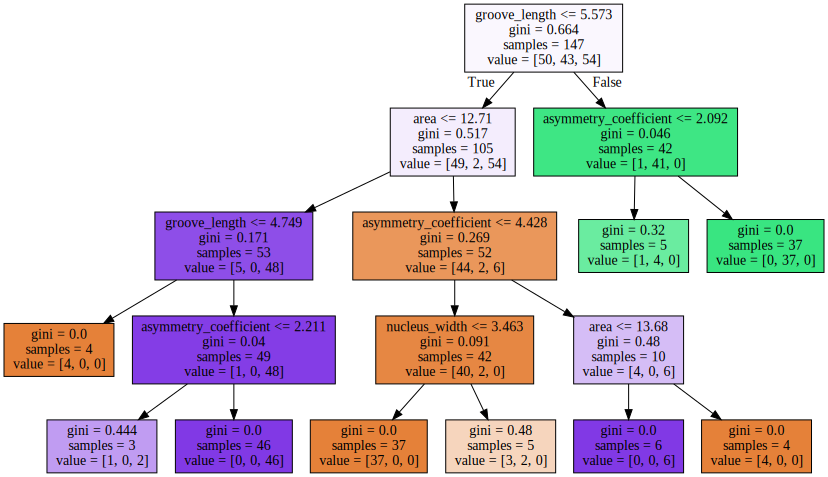

In [399]:
graph


___

<br>

### **3.4 Predicciones**

En este apartado sacaremos las precisiones que hemos conseguido tanto con el conjunto de validacion como el de entrenamiento y veremos también la *matriz de confusión*

#### **3.4.1 Predicción sobre conjunto de validación**

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
# Predecimos los datos objetivos con el árbol creado anterioremente

predictions_test = model_tree.predict(data_test)

In [402]:
# Resultaods de las predicciones

predictions_test

array([2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 3, 1, 3, 1, 2, 1, 2, 1, 2, 2,
       2, 1, 3, 1, 1, 3, 2, 3, 3, 1, 3, 2, 2, 3, 3, 3, 2, 2, 2, 1, 1, 2,
       2, 1, 3, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 2])

In [403]:
# Datos que tenía que predecir
target_test

133    2
45     1
136    2
14     1
121    2
      ..
99     2
72     2
190    3
198    3
95     2
Name: seed_type, Length: 63, dtype: int64

In [404]:
print(classification_report(target_test, predictions_test))

              precision    recall  f1-score   support

           1       0.91      1.00      0.95        20
           2       1.00      1.00      1.00        27
           3       1.00      0.88      0.93        16

    accuracy                           0.97        63
   macro avg       0.97      0.96      0.96        63
weighted avg       0.97      0.97      0.97        63



In [405]:
print(confusion_matrix(target_test, predictions_test))

[[20  0  0]
 [ 0 27  0]
 [ 2  0 14]]



___

<br>

#### **3.4.2 Predicciones sobre conjunto de entrenamiento**

In [0]:
predictions_train = model_tree.predict(data_train)

In [407]:
predictions_train

array([2, 1, 3, 1, 2, 1, 3, 3, 3, 2, 2, 2, 1, 1, 3, 3, 2, 1, 1, 1, 3, 1,
       2, 1, 3, 1, 1, 3, 3, 1, 3, 3, 2, 2, 3, 1, 1, 1, 3, 3, 3, 1, 3, 2,
       3, 2, 3, 3, 1, 3, 2, 1, 1, 1, 2, 2, 2, 2, 1, 3, 1, 3, 1, 3, 3, 1,
       2, 3, 2, 3, 3, 1, 2, 1, 1, 1, 3, 3, 1, 1, 2, 1, 2, 1, 3, 2, 2, 3,
       1, 3, 1, 2, 2, 3, 1, 1, 1, 2, 3, 3, 3, 2, 2, 2, 3, 1, 3, 1, 3, 3,
       1, 2, 3, 3, 3, 2, 3, 3, 3, 1, 3, 3, 2, 2, 2, 1, 2, 2, 1, 2, 3, 3,
       1, 1, 1, 3, 3, 1, 3, 2, 1, 2, 2, 3, 2, 2, 1])

In [408]:
target_train

96     2
26     1
169    3
35     1
87     2
      ..
134    2
202    3
86     2
78     2
17     1
Name: seed_type, Length: 147, dtype: int64

In [409]:
print(classification_report(target_train, predictions_train))

              precision    recall  f1-score   support

           1       0.96      0.96      0.96        50
           2       0.98      0.95      0.96        43
           3       0.98      1.00      0.99        54

    accuracy                           0.97       147
   macro avg       0.97      0.97      0.97       147
weighted avg       0.97      0.97      0.97       147



In [410]:
print(confusion_matrix(target_train, predictions_train))

[[48  1  1]
 [ 2 41  0]
 [ 0  0 54]]
